In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, get_sun, get_moon
import pytz

import warnings
warnings.filterwarnings('ignore', category=Warning)

from astroplan.plots import plot_sky, plot_airmass
from astroplan import Observer, FixedTarget, time_grid_from_range, observability_table, moon_illumination
from astroplan import AirmassConstraint, MoonSeparationConstraint

In [2]:
from astroplan import get_IERS_A_or_workaround

get_IERS_A_or_workaround()

In [3]:
galaxies = pd.read_csv('~/Desktop/BrowseTargets1.csv')
galaxies

,name,ra,dec
0,UGC 1,00 02 34,+16 38.7
1,UGC 10,00 03 22,+08 36.7
2,UGC 100,00 10 42,+33 21.7
3,UGC 1000,01 26 03,+50 37.6
4,UGC 10000,15 44 48,+03 56.6
5,UGC 10001,15 43 58,+44 18.6
6,UGC 10002,15 43 38,+57 15.6
7,UGC 10003,15 44 21,+41 05.6
8,UGC 10004,15 44 10,+47 16.6
9,UGC 10005,15 45 15,+00 45.7


In [4]:
CFHT = Observer(longitude = -155 * u.deg,
                    latitude = 20 * u.deg,
                    elevation = 4204 * u.m,
                    timezone = 'Pacific/Honolulu',
                    name = "CFHT"
                    )

In [5]:
ra_formatted = galaxies.ra.str.strip().str.replace('\t',' ').str.replace(' ',':')
galaxies['ra_formatted'] = ra_formatted

dec_formatted = galaxies.dec.str.strip().str.replace('\t',' ').str.replace(' ',':')
galaxies['dec_formatted'] = dec_formatted

In [6]:
galaxies.head()

,name,ra,dec,ra_formatted,dec_formatted
0,UGC 1,00 02 34,+16 38.7,00:02:34,+16:38.7
1,UGC 10,00 03 22,+08 36.7,00:03:22,+08:36.7
2,UGC 100,00 10 42,+33 21.7,00:10:42,+33:21.7
3,UGC 1000,01 26 03,+50 37.6,01:26:03,+50:37.6
4,UGC 10000,15 44 48,+03 56.6,15:44:48,+03:56.6


In [7]:
dec_arcsec = dec_formatted.str.split('.').str[1].astype(float) * 6 
galaxies['dec_formatted'] = dec_formatted.str.split('.').str[0] + ':' + dec_arcsec.astype(str)


In [8]:
galaxies['coord'] = galaxies.ra_formatted + ' ' + galaxies.dec_formatted
galaxies.head()

,name,ra,dec,ra_formatted,dec_formatted,coord
0,UGC 1,00 02 34,+16 38.7,00:02:34,+16:38:42.0,00:02:34 +16:38:42.0
1,UGC 10,00 03 22,+08 36.7,00:03:22,+08:36:42.0,00:03:22 +08:36:42.0
2,UGC 100,00 10 42,+33 21.7,00:10:42,+33:21:42.0,00:10:42 +33:21:42.0
3,UGC 1000,01 26 03,+50 37.6,01:26:03,+50:37:36.0,01:26:03 +50:37:36.0
4,UGC 10000,15 44 48,+03 56.6,15:44:48,+03:56:36.0,15:44:48 +03:56:36.0


In [9]:
coords = SkyCoord(galaxies['coord'].values, unit=(u.hour, u.deg))
coords.ra, coords.dec

(<Longitude [  0.64166667,   0.84166667,   2.675     ,  21.5125    ,
             236.2       , 235.99166667, 235.90833333, 236.0875    ,
             236.04166667, 236.3125    , 236.16666667, 236.1125    ,
             234.67083333, 236.4       ,  21.41666667, 236.175     ,
             236.32916667, 236.27083333, 236.1       , 236.4375    ,
             236.4       , 236.375     , 236.4       , 235.925     ,
             236.37916667,  21.45      , 236.45416667, 236.41666667,
             236.17916667, 236.5375    , 236.57916667, 236.60416667,
             236.57083333, 236.62083333, 236.4375    , 236.71666667,
              21.4375    , 236.77083333, 236.3375    , 236.05833333,
             236.74166667, 236.675     , 236.9       , 236.9375    ,
             237.04583333, 237.05      , 237.14166667,  21.4375    ,
             237.16666667, 237.24583333, 237.2375    , 237.17083333,
             237.2125    , 237.3375    , 237.3625    , 236.6625    ,
             237.33333333, 237.320

In [10]:
#galaxies = pd.read_csv('~/Desktop/BrowseTargets1.csv')
galaxies['ra'] = coords.ra
galaxies['dec'] = coords.dec
galaxies

,name,ra,dec,ra_formatted,dec_formatted,coord
0,UGC 1,0.641667,16.645000,00:02:34,+16:38:42.0,00:02:34 +16:38:42.0
1,UGC 10,0.841667,8.611667,00:03:22,+08:36:42.0,00:03:22 +08:36:42.0
2,UGC 100,2.675000,33.361667,00:10:42,+33:21:42.0,00:10:42 +33:21:42.0
3,UGC 1000,21.512500,50.626667,01:26:03,+50:37:36.0,01:26:03 +50:37:36.0
4,UGC 10000,236.200000,3.943333,15:44:48,+03:56:36.0,15:44:48 +03:56:36.0
5,UGC 10001,235.991667,44.310000,15:43:58,+44:18:36.0,15:43:58 +44:18:36.0
6,UGC 10002,235.908333,57.260000,15:43:38,+57:15:36.0,15:43:38 +57:15:36.0
7,UGC 10003,236.087500,41.093333,15:44:21,+41:05:36.0,15:44:21 +41:05:36.0
8,UGC 10004,236.041667,47.276667,15:44:10,+47:16:36.0,15:44:10 +47:16:36.0
9,UGC 10005,236.312500,0.761667,15:45:15,+00:45:42.0,15:45:15 +00:45:42.0


In [48]:
window_start = Time("2019-9-29 12:00:00")
window_end = Time("2019-9-30 12:00:00")
print(window_start.to_datetime(CFHT.timezone))

2019-09-29 02:00:00-10:00


In [49]:
observe_start1 = CFHT.twilight_evening_astronomical(window_start, which='previous')
observe_end1 = CFHT.twilight_morning_astronomical(window_start, which='nearest')
observing_length1 = (observe_end1 - observe_start1)
observing_range1 = [observe_start1, observe_end1]
print("You can observe for {0:.1f} tonight.".format(observing_length1.to(u.h)))

You can observe for 9.6 h tonight.


In [50]:
table_values = galaxies.as_matrix()[0:20,0:3]

In [51]:
targets = [FixedTarget(coord=SkyCoord(ra = RA*u.hourangle, dec = DEC*u.deg), name=Name)
           for Name, RA, DEC in table_values]

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

from astroplan import time_grid_from_range
from astroplan.plots import plot_sky, plot_airmass

In [53]:
window_range = [window_start, window_end]
window_time_grid = time_grid_from_range(window_range)

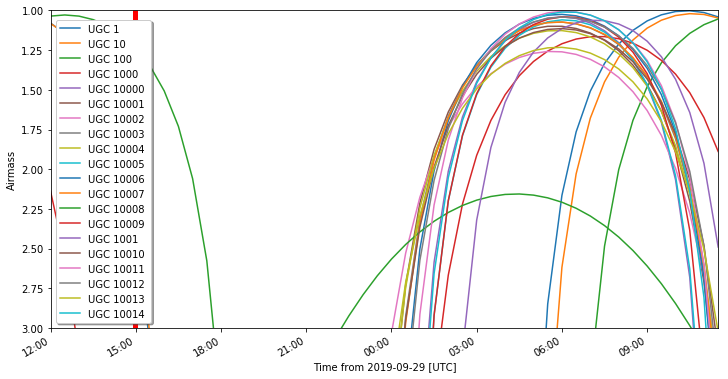

In [54]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()

for my_object in targets:
    ax = plot_airmass(my_object, CFHT, window_time_grid)

ax.vlines(observe_start1.datetime, 1,3, color='r', linewidth=5)
ax.vlines(observe_end1.datetime, 1,3, color='r', linewidth=5)

ax.legend(loc=0,shadow=True);

In [55]:
window_start = Time("2019-10-29 12:00:00")
window_end = Time("2019-10-30 12:00:00")
print(window_start.to_datetime(CFHT.timezone))

2019-10-29 02:00:00-10:00


In [56]:
observe_start1 = CFHT.twilight_evening_astronomical(window_start, which='previous')
observe_end1 = CFHT.twilight_morning_astronomical(window_start, which='nearest')
observing_length1 = (observe_end1 - observe_start1)
observing_range1 = [observe_start1, observe_end1]
print("You can observe for {0:.1f} tonight.".format(observing_length1.to(u.h)))

You can observe for 10.1 h tonight.


In [57]:
window_range = [window_start, window_end]
window_time_grid = time_grid_from_range(window_range)

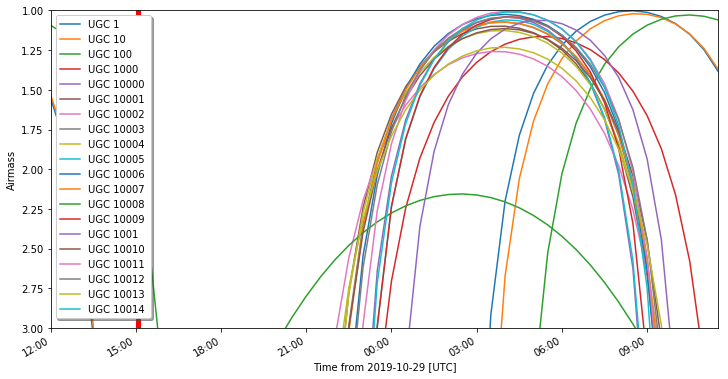

In [58]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()

for my_object in targets:
    ax = plot_airmass(my_object, CFHT, window_time_grid)

ax.vlines(observe_start1.datetime, 1,3, color='r', linewidth=5)
ax.vlines(observe_end1.datetime, 1,3, color='r', linewidth=5)

ax.legend(loc=0,shadow=True);

In [59]:
window = Time("2019-9-29 00:00:00")

from astroplan import moon_illumination
moon_illumination(window)

0.0027301705284619726